### "Шапка" с названием проекта

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [1]:
# сделайте разделение изначального набора данных в этой ячейке
#шаг разделение после EDA

#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


In [1]:
#импортирую библиотеки, создаю подключение
import os
import psycopg
import pandas as pd
import mlflow
from catboost import CatBoostClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import seaborn as sns


# подгружаем .env
load_dotenv()

dst_host = os.environ.get('DB_DESTINATION_HOST')
dst_port = os.environ.get('DB_DESTINATION_PORT')
dst_username = os.environ.get('DB_DESTINATION_USER')
dst_password = os.environ.get('DB_DESTINATION_PASSWORD')
dst_db = os.environ.get('DB_DESTINATION_NAME')

connection = {"sslmode": "require", "target_session_attrs": "read-write"}
postgres_credentials = {
    "host": os.getenv('DB_DESTINATION_HOST'),"port": os.getenv('DB_DESTINATION_PORT'),"dbname": os.getenv('DB_DESTINATION_NAME'),
    "user": os.getenv('DB_DESTINATION_USER'),"password": os.getenv('DB_DESTINATION_PASSWORD')}
connection.update(postgres_credentials)

#таблицы flats и buildings изучаю отдельно

In [3]:
# 2.1 Загрузка данных

#загружаю таблицу Flats
TABLE_NAME = "flats" 

with psycopg.connect(**connection) as conn:
    with conn.cursor() as cur:
        cur.execute(f"SELECT * FROM {TABLE_NAME}")
        data = cur.fetchall()
        columns = [col[0] for col in cur.description]

df = pd.DataFrame(data, columns=columns)

df.head(2)

,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,building_id
0,0,9,False,9.9,19.9,1,False,35.099998,9500000,6220
1,1,7,False,0.0,16.6,1,False,43.000000,13500000,18012


In [4]:
# 2.1 Загрузка данных

#загружаю таблицу buildings

TABLE_NAME='buildings'

with psycopg.connect(**connection) as conn:
    with conn.cursor() as cur:
        cur.execute(f"SELECT * FROM {TABLE_NAME}")
        data = cur.fetchall()
        columns = [col[0] for col in cur.description]

data_build = pd.DataFrame(data, columns=columns)

data_build.head(2)

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator
0,6220,1965,6,55.717113,37.781120,2.64,84,12,True
1,18012,2001,2,55.794849,37.608013,3.00,97,10,True


In [5]:
# 2.2. Общий обзор датасета
# 2.3 Анализ признаков для модели
# 2.4 Анализ целевой переменной
# 2.4 Анализ целевой переменной в зависимости от различных признаков
# 2.5 Выводы после EDA

отдельно исследую таблицы flats и buildings - надо решить как объединить их в 1 датасет, какие фильтры использовать

ТАБЛИЦА 1 - КВАРТИРЫ

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141362 entries, 0 to 141361
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            141362 non-null  int64  
 1   floor         141362 non-null  int64  
 2   is_apartment  141362 non-null  bool   
 3   kitchen_area  141362 non-null  float64
 4   living_area   141362 non-null  float64
 5   rooms         141362 non-null  int64  
 6   studio        141362 non-null  bool   
 7   total_area    141362 non-null  float64
 8   price         141362 non-null  int64  
 9   building_id   141362 non-null  int64  
dtypes: bool(2), float64(3), int64(5)
memory usage: 8.9 MB


In [6]:
df.describe()

,id,floor,kitchen_area,living_area,rooms,total_area,price,building_id
count,141362.000000,141362.000000,141362.000000,141362.000000,141362.000000,141362.000000,1.413620e+05,141362.000000
mean,70680.500000,7.467346,9.001579,31.056948,2.129476,62.374644,1.944162e+07,14053.665235
std,40807.838714,5.717144,5.264076,23.968640,0.994340,40.295864,6.626954e+07,6988.831066
min,0.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.100000e+01,1.000000
25%,35340.250000,3.000000,6.100000,19.000000,1.000000,39.299999,8.900000e+06,8535.250000
50%,70680.500000,6.000000,8.800000,29.400000,2.000000,53.000000,1.185000e+07,14332.000000
75%,106020.750000,10.000000,10.200000,41.400002,3.000000,72.000000,1.695000e+07,20475.000000
max,141361.000000,56.000000,203.000000,700.000000,20.000000,960.299988,9.873738e+09,24620.000000


In [8]:
features = df[['floor','is_apartment','kitchen_area','living_area','rooms','studio','total_area','price']]
res=features.dtypes

print(res.value_counts())

int64      3
float64    3
bool       2
Name: count, dtype: int64


In [9]:
num_features = features.select_dtypes(include=['float64', 'int64'])
binary_features = features.select_dtypes(include='bool') 

num_features.head()

,floor,kitchen_area,living_area,rooms,total_area,price
0,9,9.9,19.900000,1,35.099998,9500000
1,7,0.0,16.600000,1,43.000000,13500000
2,9,9.0,32.000000,2,56.000000,13500000
3,1,10.1,43.099998,3,76.000000,20000000
4,3,3.0,14.000000,1,24.000000,5200000


count    141362.000000
mean          7.467346
std           5.717144
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          56.000000
Name: floor, dtype: float64

<Axes: xlabel='floor', ylabel='Count'>

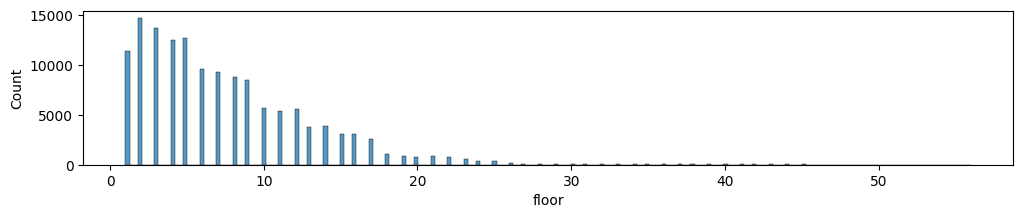

In [10]:
display(num_features['floor'].describe())
plt.figure(figsize=(12, 2))
display(sns.histplot(num_features['floor'])) 

<Axes: xlabel='floor'>

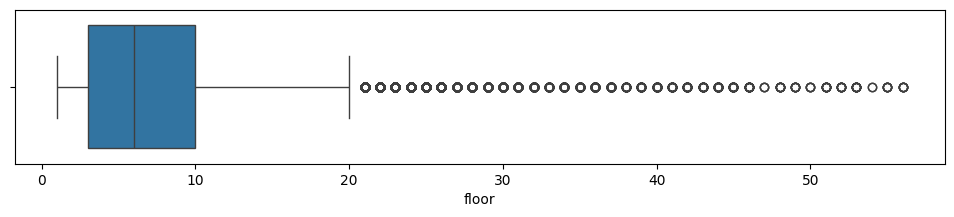

In [11]:
plt.figure(figsize=(12, 2))
sns.boxplot(df,x='floor')

count    141362.000000
mean          2.129476
std           0.994340
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: rooms, dtype: float64

<Axes: xlabel='rooms', ylabel='Count'>

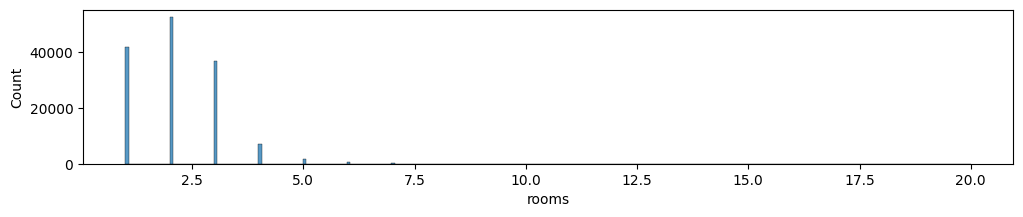

In [12]:
display(num_features['rooms'].describe())
plt.figure(figsize=(12, 2))
display(sns.histplot(num_features['rooms'])) 

In [ ]:
#смотрим цены в миллионах - в основном до 17 миллионов
# есть подозрительно малые значения
# есть очень большое значение - скорее всего ошибки
df['price_']=df['price']/1000000

display(df['price_'].describe())

count    141362.000000
mean         19.441620
std          66.269544
min           0.000011
25%           8.900000
50%          11.850000
75%          16.950000
max        9873.737728
Name: price_, dtype: float64

<Axes: xlabel='price_'>

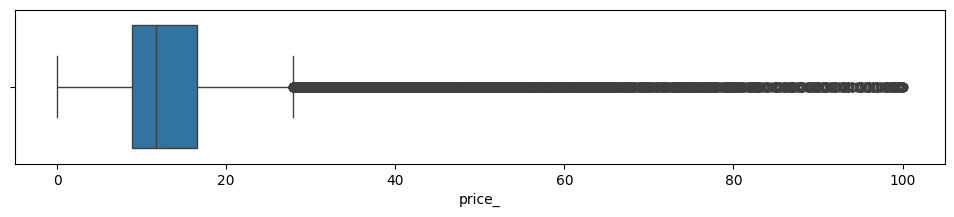

In [14]:
#пробую сделать расчет без очень дорогих квартир - более 100 млн
plt.figure(figsize=(12, 2))
sns.boxplot(df.query('price<100000000'),x='price_')

count    141362.000000
mean         62.374644
std          40.295864
min          11.000000
25%          39.299999
50%          53.000000
75%          72.000000
max         960.299988
Name: total_area, dtype: float64

<Axes: xlabel='total_area', ylabel='Count'>

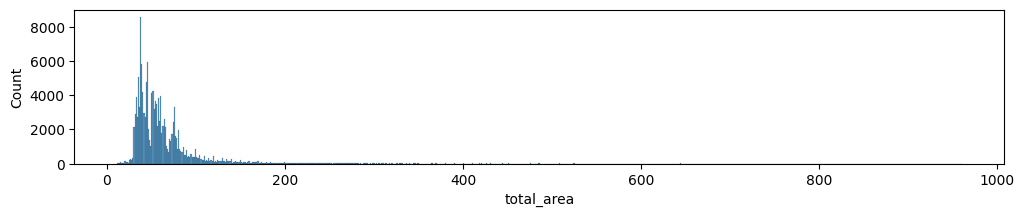

In [15]:
# area kitchen_area	living_area total_area	price
plt.figure(figsize=(12, 2))
display(num_features['total_area'].describe())
display(sns.histplot(num_features['total_area'])) 

# есть аномальное значение в 1000 кв метров
# большинство значений сосредоточено до 100 квадратных метров
#есть подозрительное значение в 11 квадратных метров, нет нулевых значений

count    141362.000000
mean          9.001579
std           5.264076
min           0.000000
25%           6.100000
50%           8.800000
75%          10.200000
max         203.000000
Name: kitchen_area, dtype: float64

<Axes: xlabel='kitchen_area', ylabel='Count'>

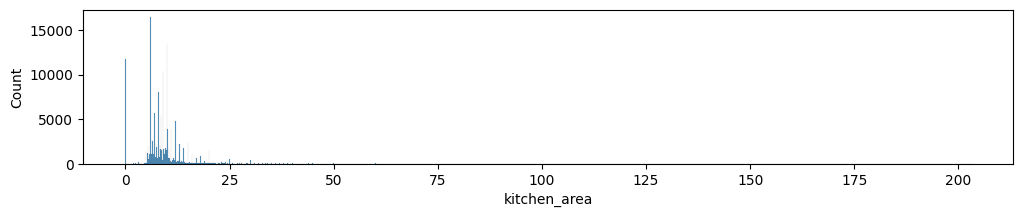

In [16]:
# area kitchen_area	living_area total_area	price
plt.figure(figsize=(12, 2))
display(num_features['kitchen_area'].describe())
display(sns.histplot(num_features['kitchen_area'])) 

# встречаются пропуски в данных
# в основном наблюдейния - до 10 квадратных метров кухни
# есть аномалии в 200 квадратов

count    141362.000000
mean         31.056948
std          23.968640
min           0.000000
25%          19.000000
50%          29.400000
75%          41.400002
max         700.000000
Name: living_area, dtype: float64

<Axes: xlabel='living_area', ylabel='Count'>

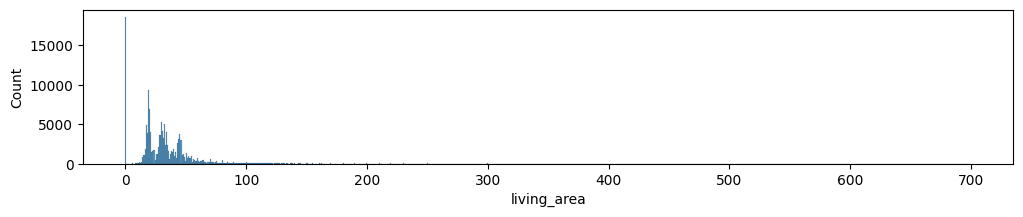

In [17]:
# area kitchen_area	living_area total_area	price
plt.figure(figsize=(12, 2))
display(num_features['living_area'].describe())
display(sns.histplot(num_features['living_area'])) 

# встречаются пропуски в данных
# в основном наблюдейния - до 50 квадратных метров
# есть аномалии в 700 квадратов

In [18]:
# студий нет - признак бесполезный, можно удалить
df.groupby('studio')['floor'].count()

studio
False    141362
Name: floor, dtype: int64

In [ ]:
df.groupby('is_apartment')['floor'].count()

is_apartment
False    139990
True       1372
Name: floor, dtype: int64

In [20]:
df.groupby('is_apartment')['price_'].mean()

is_apartment
False    19.290498
True     34.861125
Name: price_, dtype: float64

In [ ]:
# проверка на явные дубли
is_duplicated_id = df.duplicated(subset=['id'], keep=False)
print(sum(is_duplicated_id))

0


In [22]:
#дубликаты на основе равенства значений признаков

feature_cols_flats=['floor','is_apartment','kitchen_area','living_area','rooms','studio','total_area','building_id','price_']
is_duplicated_features = df.duplicated(subset=feature_cols_flats, keep='last')
print(df[is_duplicated_features==True].sort_values(by=['floor','price_'],ascending=True))
print(len(df[is_duplicated_features]))

            id  floor  is_apartment  kitchen_area  living_area  rooms  studio   
22196    22196      1         False           4.0    19.000000      1   False  \
15724    15724      1         False           3.0     7.000000      1   False   
45592    45592      1          True           0.0     0.000000      2   False   
63895    63895      1         False           9.0    13.000000      1   False   
78512    78512      1         False           3.0     0.000000      1   False   
...        ...    ...           ...           ...          ...    ...     ...   
54518    54518     48         False           0.0   149.545456      3   False   
121900  121900     53         False           0.0   149.545456      3   False   
20036    20036     55         False           8.0     0.000000      1   False   
10598    10598     55         False           0.0    49.700001      2   False   
121908  121908     56         False          20.0   115.000000      3   False   

        total_area     pric

основные выводы по таблице с квартирами

 - в таблице есть бинарные (is_apartment,studio) и числовые (floor,kitchen_area,living_area,rooms,total_area) признаки
 - бинарные признаки studio - не заполнен, is_apartment - заполнен
 - этаж floor - от 1 до 56, нет пропусков
 - площадь кухни и жилых помещений kitchen_area, living_area - есть пропуски, надо восстанавливать значения
 - количество комнат rooms - от 1 до 20, есть выбросы (редкие большие значения)
 - общая площадь total_area - от 11 до 960 метров, есть выбросы (редкие большие значения)
 - цена (целевой признак) - есть выбросы
 - явных дублей нет
 - есть неявные дубли (необходимо чистить)

ТАБЛИЦА 2 - ЗДАНИЯ

In [7]:
data_build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24620 entries, 0 to 24619
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 24620 non-null  int64  
 1   build_year         24620 non-null  int64  
 2   building_type_int  24620 non-null  int64  
 3   latitude           24620 non-null  float64
 4   longitude          24620 non-null  float64
 5   ceiling_height     24620 non-null  float64
 6   flats_count        24620 non-null  int64  
 7   floors_total       24620 non-null  int64  
 8   has_elevator       24620 non-null  bool   
dtypes: bool(1), float64(3), int64(5)
memory usage: 1.5 MB


In [24]:
data_build.head(2)

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator
0,6220,1965,6,55.717113,37.781120,2.64,84,12,True
1,18012,2001,2,55.794849,37.608013,3.00,97,10,True


In [25]:
data_build.describe()

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total
count,24620.00000,24620.000000,24620.000000,24620.000000,24620.000000,24620.000000,24620.000000,24620.000000
mean,12310.50000,1981.377295,3.153656,55.738892,37.593816,2.753557,184.882575,12.441024
std,7107.32615,22.657856,1.636435,0.101094,0.145408,0.277912,158.427509,6.271325
min,1.00000,1901.000000,0.000000,55.211460,36.864372,2.000000,1.000000,1.000000
25%,6155.75000,1965.000000,1.000000,55.668725,37.499031,2.640000,80.000000,8.000000
50%,12310.50000,1978.000000,4.000000,55.742020,37.588400,2.640000,139.000000,12.000000
75%,18465.25000,2002.000000,4.000000,55.811775,37.698833,2.900000,242.000000,16.000000
max,24620.00000,2023.000000,6.000000,56.011032,37.946411,27.000000,4455.000000,99.000000


In [26]:
features_build = data_build[['build_year','building_type_int','latitude','longitude','ceiling_height','flats_count','floors_total','has_elevator']]
res_build=features_build.dtypes
print(res_build.value_counts())

int64      4
float64    3
bool       1
Name: count, dtype: int64


In [27]:
data_build.groupby('has_elevator')['id'].count()

has_elevator
False     4295
True     20325
Name: id, dtype: int64

count    24620.000000
mean      1981.377295
std         22.657856
min       1901.000000
25%       1965.000000
50%       1978.000000
75%       2002.000000
max       2023.000000
Name: build_year, dtype: float64

<Axes: xlabel='build_year', ylabel='Count'>

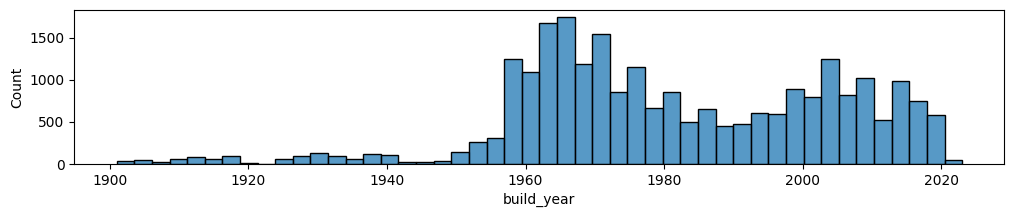

In [28]:
plt.figure(figsize=(12, 2))
num_features_build = features_build.select_dtypes(include=['float64', 'int64'])
display(num_features_build['build_year'].describe())
display(sns.histplot(num_features_build['build_year'])) 

count    24620.000000
mean         3.153656
std          1.636435
min          0.000000
25%          1.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: building_type_int, dtype: float64

<Axes: xlabel='building_type_int', ylabel='Count'>

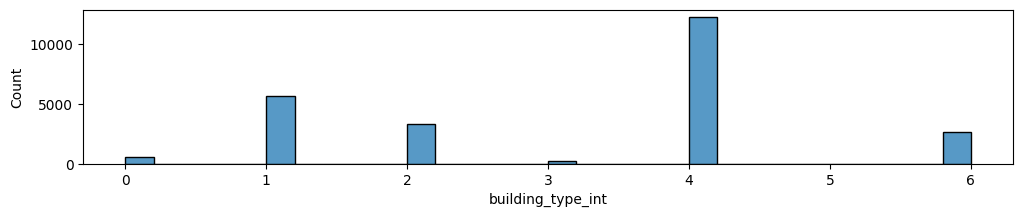

In [29]:
# не уверен что категория имеет смысл
# для первой версии модели не используем
plt.figure(figsize=(12, 2))
#тип - это категория, не числовой признак же
display(num_features_build['building_type_int'].describe())
display(sns.histplot(num_features_build['building_type_int'])) 

count    24620.000000
mean        55.738892
std          0.101094
min         55.211460
25%         55.668725
50%         55.742020
75%         55.811775
max         56.011032
Name: latitude, dtype: float64

<Axes: xlabel='latitude', ylabel='Count'>

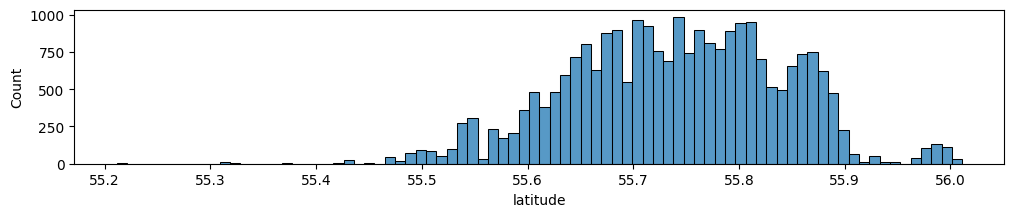

In [30]:
plt.figure(figsize=(12, 2))
display(num_features_build['latitude'].describe())
display(sns.histplot(num_features_build['latitude'])) 

#заполнено хорошо, кучно, без выбросов

count    24620.000000
mean        37.593816
std          0.145408
min         36.864372
25%         37.499031
50%         37.588400
75%         37.698833
max         37.946411
Name: longitude, dtype: float64

<Axes: xlabel='longitude', ylabel='Count'>

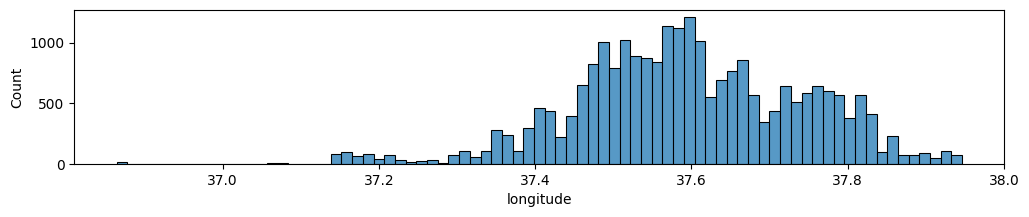

In [31]:
plt.figure(figsize=(12, 2))
display(num_features_build['longitude'].describe())
display(sns.histplot(num_features_build['longitude'])) 

# тоже заполнено хорошо

count    24620.000000
mean         2.753557
std          0.277912
min          2.000000
25%          2.640000
50%          2.640000
75%          2.900000
max         27.000000
Name: ceiling_height, dtype: float64

<Axes: xlabel='ceiling_height', ylabel='Count'>

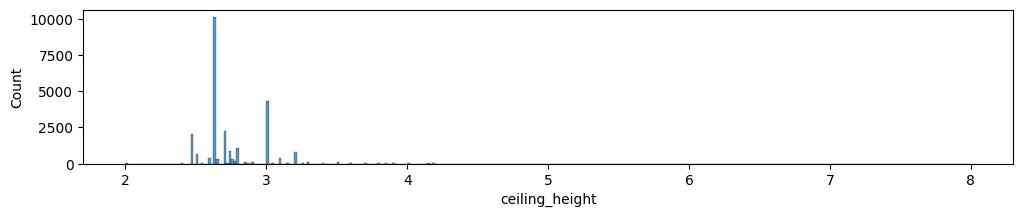

In [32]:
plt.figure(figsize=(12, 2))
display(num_features_build['ceiling_height'].describe())
display(sns.histplot(num_features_build.query('ceiling_height<10')['ceiling_height'])) 

# посмотреть что за потолки менее 2.2 и более 5 - выбросы

count    24620.000000
mean       184.882575
std        158.427509
min          1.000000
25%         80.000000
50%        139.000000
75%        242.000000
max       4455.000000
Name: flats_count, dtype: float64

<Axes: xlabel='flats_count', ylabel='Count'>

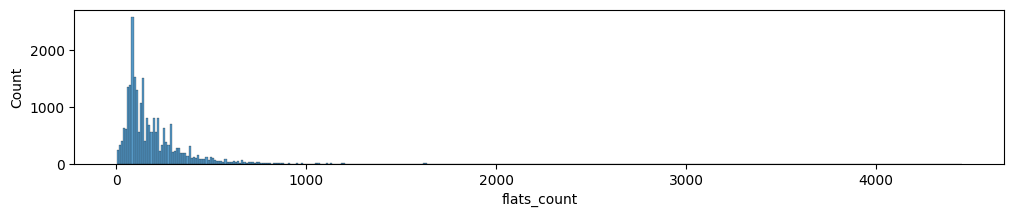

In [33]:
plt.figure(figsize=(12, 2))
display(num_features_build['flats_count'].describe())
display(sns.histplot(num_features_build['flats_count'])) 

# в основном до 2000 квартир, есть выбросы

count    24620.000000
mean        12.441024
std          6.271325
min          1.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         99.000000
Name: floors_total, dtype: float64

<Axes: xlabel='floors_total', ylabel='Count'>

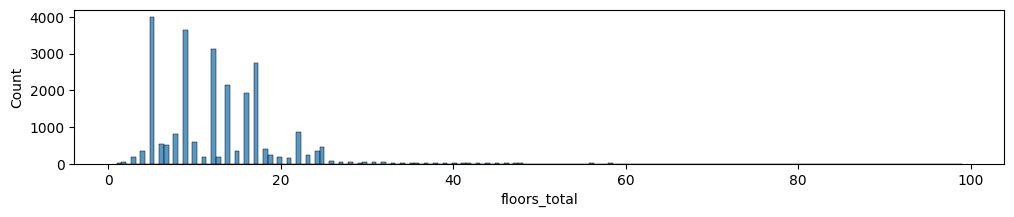

In [34]:
plt.figure(figsize=(12, 2))
display(num_features_build['floors_total'].describe())
display(sns.histplot(num_features_build['floors_total'])) 

#от 0 до 100 этажей

In [35]:
#Поиск дублей в данных - это идентичные либо почти идентичные наблюдения в наборе данных.

#все записи имеют свой уникальный

is_duplicated_id_build = data_build.duplicated(subset=['id'], keep=False)
print(sum(is_duplicated_id_build))

0


In [36]:
#дубликаты на основе равенства значений признаков

feature_cols_flats=['build_year','latitude','longitude','flats_count','floors_total']
is_duplicated_features = data_build.duplicated(subset=feature_cols_flats, keep='last')
print(data_build[is_duplicated_features==True])
print(len(data_build[is_duplicated_features]))


Empty DataFrame
Columns: [id, build_year, building_type_int, latitude, longitude, ceiling_height, flats_count, floors_total, has_elevator]
Index: []
0


основные выводы по таблице с домами

 - в таблице есть бинарные (has_elevator) , категориальные (building_type_int) и числовые (build_year, latitude, longitude, ceiling_height, flats_count, floors_total) признаки
 - бинарный признак has_elevator - заполнен хорошо
 - build_year - c 1900 года
 - гео признаки - latitude и longitude - напрямую использовать в модели не получится, можно выделить районы и посмотреть зависимость цены от района
 - ceiling_height, flats_count, floors_total - есть выбросы в данных
 - неявных и явных дублей в таблице с домами нет


ОБЪЕДИНЯЕМ В 1 ДАТАСЕТ

In [29]:
dst_conn = create_engine(f'postgresql://{dst_username}:{dst_password}@{dst_host}:{dst_port}/{dst_db}')


SQL_result = f"""select b.id, a.build_year, a.building_type_int, a.latitude, a.longitude, a.ceiling_height, a.flats_count, a.floors_total, a.has_elevator,
b.floor, b.is_apartment, b.kitchen_area, b.living_area, b.rooms, b.studio, b.total_area, b.price, b.building_id
from buildings as a 
left join flats as b on a.id=b.building_id"""

data_set=pd.read_sql(SQL_result, dst_conn)
data_set

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,building_id
0,0,1965,6,55.717113,37.781120,2.64,84,12,True,9,False,9.90,19.900000,1,False,35.099998,9500000,6220
1,1,2001,2,55.794849,37.608013,3.00,97,10,True,7,False,0.00,16.600000,1,False,43.000000,13500000,18012
2,2,2000,4,55.740040,37.761742,2.70,80,10,True,9,False,9.00,32.000000,2,False,56.000000,13500000,17821
3,3,2002,4,55.672016,37.570877,2.64,771,17,True,1,False,10.10,43.099998,3,False,76.000000,20000000,18579
4,4,1971,1,55.808807,37.707306,2.60,208,9,True,3,False,3.00,14.000000,1,False,24.000000,5200000,9293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141357,141357,2013,4,55.626579,37.313503,2.64,672,25,True,16,False,11.00,18.000000,1,False,42.000000,10500000,22455
141358,141358,1960,1,55.727470,37.768677,2.48,80,5,False,5,False,5.28,28.330000,2,False,41.110001,7400000,3162
141359,141359,1966,4,55.704315,37.506584,2.64,72,9,True,7,False,5.30,20.000000,1,False,31.500000,9700000,6513
141360,141360,2017,4,55.699863,37.939564,2.70,480,25,True,15,False,13.80,33.700001,2,False,65.300003,11750000,23952


In [30]:
data_set.columns

Index(['id', 'build_year', 'building_type_int', 'latitude', 'longitude',
       'ceiling_height', 'flats_count', 'floors_total', 'has_elevator',
       'floor', 'is_apartment', 'kitchen_area', 'living_area', 'rooms',
       'studio', 'total_area', 'price', 'building_id'],
      dtype='object')

In [31]:
#процесс очистки данных
#1 - цену квартиры - убираем выбросы
#2 - количество комнат - не более 10
#3 - общая площадь не более 500
#4 - потолки - от 2.2 до 5 метров
#5 - в доме не более 2000 квартир
#6 - этажей в доме не более 40

data_set=data_set.query('price<100000000 and price>500000')
data_set=data_set.query('rooms<10')
data_set=data_set.query('total_area<500')
data_set=data_set.query('ceiling_height>=2.2 and ceiling_height<5')
data_set=data_set.query('flats_count<2000')
data_set=data_set.query('floors_total<=40')

In [32]:
# чистим от неявных дублей
#дубликаты на основе равенства значений признаков

feature_cols_flats=['floor','is_apartment','rooms','total_area','building_id','price']
is_duplicated_features = data_set.duplicated(subset=feature_cols_flats, keep='last')

data_set = data_set[~is_duplicated_features].reset_index(drop=True) 

In [33]:
data_set.describe()

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,floor,kitchen_area,living_area,rooms,total_area,price,building_id
count,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,1.261260e+05,126126.000000
mean,72046.998874,1986.046335,3.275716,55.729602,37.589727,2.739782,247.951334,13.801001,7.290725,8.886292,30.242742,2.077700,58.553906,1.517851e+07,13861.849008
std,41006.172216,21.774252,1.461175,0.104041,0.152329,0.192629,187.882320,6.066906,5.282128,4.719720,19.908488,0.920803,27.896234,1.210873e+07,6924.106523
min,0.000000,1901.000000,0.000000,55.211460,36.864372,2.250000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,11.000000,6.000000e+05,1.000000
25%,36639.250000,1969.000000,2.000000,55.652493,37.491108,2.640000,112.000000,9.000000,3.000000,6.200000,19.000000,1.000000,39.000000,8.890000e+06,8443.000000
50%,73151.500000,1984.000000,4.000000,55.721928,37.581676,2.640000,200.000000,14.000000,6.000000,8.700000,29.400000,2.000000,52.000000,1.160000e+07,14051.000000
75%,107517.750000,2006.000000,4.000000,55.809364,37.698715,2.800000,321.000000,17.000000,10.000000,10.100000,40.500000,3.000000,69.000000,1.620000e+07,20173.000000
max,141361.000000,2023.000000,6.000000,56.011032,37.946411,4.600000,1630.000000,40.000000,40.000000,102.000000,300.000000,9.000000,470.000000,9.999999e+07,24620.000000


In [34]:
#признаки VS целевая переменная
#смотрю корреляцию признаков и целевой переменной
data_set_corr=data_set.drop(columns=['id','building_id','studio'])
correlation_matrix=data_set_corr.corr()
round(correlation_matrix,1)

#выводы
#цена положительно зависит от площади, от количества комнат, от размера потолка и слабо отрицательно от количества квартир в доме
#наличие лифта, этажность, признак апартаментов почти не влияют на цену
#зависимость между признаками
#год постройки дома и этажность и количества квартир связаны положительно, в новых домах больше квартир и этажей
#положительно связаны высота потолков и площадь (в больших метрах более комфортные условия - возможно выше классом)
#очевидно связаны этажность и наличие лифта
#апартаменты появляются в более новых домах


#важно
#тип квартиры - надо исследовать отдельно
#геоданные - надо исследовать отдельно


,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,is_apartment,kitchen_area,living_area,rooms,total_area,price
build_year,1.0,0.0,-0.2,-0.2,0.1,0.4,0.7,0.3,0.4,0.0,0.3,0.0,-0.0,0.2,0.1
building_type_int,0.0,1.0,-0.0,0.1,-0.5,0.0,0.1,0.2,0.0,-0.0,-0.1,-0.2,-0.2,-0.3,-0.3
latitude,-0.2,-0.0,1.0,-0.0,-0.0,-0.1,-0.1,-0.0,-0.0,0.0,-0.1,0.0,0.0,-0.0,0.0
longitude,-0.2,0.1,-0.0,1.0,-0.1,-0.1,-0.1,-0.0,-0.1,-0.0,-0.1,-0.0,-0.0,-0.1,-0.1
ceiling_height,0.1,-0.5,-0.0,-0.1,1.0,0.0,0.1,0.0,0.1,0.1,0.3,0.2,0.2,0.5,0.5
flats_count,0.4,0.0,-0.1,-0.1,0.0,1.0,0.4,0.2,0.2,-0.0,0.1,-0.0,-0.0,0.0,-0.0
floors_total,0.7,0.1,-0.1,-0.1,0.1,0.4,1.0,0.4,0.6,0.0,0.3,0.1,0.0,0.2,0.2
has_elevator,0.3,0.2,-0.0,-0.0,0.0,0.2,0.4,1.0,0.2,0.0,0.1,0.0,0.0,0.1,0.0
floor,0.4,0.0,-0.0,-0.1,0.1,0.2,0.6,0.2,1.0,0.0,0.2,0.1,0.0,0.2,0.1
is_apartment,0.0,-0.0,0.0,-0.0,0.1,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0


In [35]:
#посмотрим на тип дома и средние цены объявлений

data_set['price_krur']=data_set['price']/1000

agg_ds=data_set.groupby('building_type_int').agg({'price_krur':'mean'}).reset_index()

agg_ds
#есть прям дорогой тип 3

,building_type_int,price_krur
0,0,19650.266065
1,1,18961.183118
2,2,25005.699428
3,3,32092.982178
4,4,11599.258210
5,5,8150.000000
6,6,10548.118706


In [36]:
data_set.query('building_type_int==3').describe()

#это новые здания 2010 год
#потолки около 3 метров
#относительно мало квартир и небольшая этажность
#большие площади

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,floor,kitchen_area,living_area,rooms,total_area,price,building_id,price_krur
count,1013.000000,1013.000000,1013.0,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1.013000e+03,1013.000000,1013.000000
mean,77026.269497,2011.337611,3.0,55.702429,37.500757,2.996515,337.023692,18.796644,10.382034,11.811935,42.712307,2.541955,98.506407,3.209298e+07,21884.691017,32092.982178
std,40158.588411,7.106790,0.0,0.103246,0.160435,0.169804,273.051226,10.781522,8.672520,9.818336,38.433423,1.069459,46.684460,2.350390e+07,2516.090195,23503.904341
min,25.000000,1959.000000,3.0,55.467682,37.151428,2.480000,10.000000,3.000000,1.000000,0.000000,0.000000,1.000000,29.900000,3.985875e+06,2933.000000,3985.875000
25%,46159.000000,2008.000000,3.0,55.614487,37.467327,3.000000,124.000000,9.000000,4.000000,0.000000,0.000000,2.000000,65.000000,1.280000e+07,20940.000000,12800.000000
50%,82166.000000,2015.000000,3.0,55.714626,37.516010,3.000000,297.000000,17.000000,8.000000,12.000000,39.000000,3.000000,95.300003,2.450000e+07,23120.000000,24500.000000
75%,112152.000000,2015.000000,3.0,55.774426,37.653236,3.000000,461.000000,25.000000,14.000000,16.000000,67.000000,3.000000,125.000000,4.560000e+07,23137.000000,45600.000000
max,140653.000000,2019.000000,3.0,55.852375,37.805840,3.800000,827.000000,40.000000,37.000000,60.000000,230.000000,8.000000,376.000000,9.950194e+07,24475.000000,99501.936000


<Axes: xlabel='building_type_int', ylabel='price_krur'>

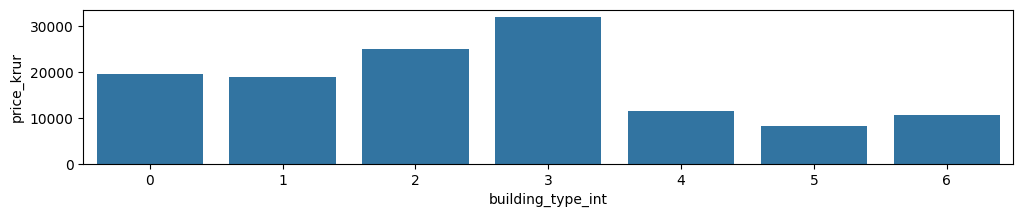

In [37]:
#добавим визуализацию
plt.figure(figsize=(12, 2))
import seaborn as sns
sns.barplot(data=agg_ds,y='price_krur',x='building_type_int')


#явно выделяется тип 3 - может быть полезно

In [38]:
#теперь разберемся с гео признаками, для этого надо закодировать их
# тип здания onehot encoder

territory_features=data_set[['latitude','longitude']]
building_type_feature=data_set[['building_type_int']]

#Объединяем трансформации
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,KBinsDiscretizer

building_type_cols = building_type_feature.columns.tolist()
territory_cols=territory_features.columns.tolist()

# определите список трансформаций в рамках ColumnTransformer
preprocessor = ColumnTransformer(
[('build_type',OneHotEncoder(),building_type_cols),
 ('geo',KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'),territory_cols)],verbose_feature_names_out=False,remainder='passthrough'
)

# трансформируйте исходные данные data с помощью созданного preprocessor
data_transformed = preprocessor.fit_transform(data_set,data_set['price'])
data_transformed=pd.DataFrame(data_transformed, columns=preprocessor.get_feature_names_out())
data_transformed.head(2).T

/home/mle-user/mle_projects/mle-project-sprint-2/.venv_project_sprint2/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,0,1
building_type_int_0,0.0,0.0
building_type_int_1,0.0,0.0
building_type_int_2,0.0,1.0
building_type_int_3,0.0,0.0
building_type_int_4,0.0,0.0
building_type_int_5,0.0,0.0
building_type_int_6,1.0,0.0
latitude,6.0,7.0
longitude,8.0,6.0
id,0,1


In [39]:
agg_geo=data_transformed.groupby(['latitude','longitude']).agg({'price_krur':'mean'}).reset_index()

#групповой индекс района
agg_geo[['latitude','longitude']]=agg_geo[['latitude','longitude']].astype('str')
agg_geo['rayon']=agg_geo['latitude']+'/'+agg_geo['longitude']

agg_geo.head(5)

,latitude,longitude,price_krur,rayon
0,0.0,1.0,3819.91913,0.0/1.0
1,1.0,2.0,4969.230769,1.0/2.0
2,1.0,3.0,7530.0,1.0/3.0
3,1.0,4.0,4850.0,1.0/4.0
4,2.0,0.0,5651.25,2.0/0.0


<Axes: xlabel='rayon', ylabel='price_krur'>

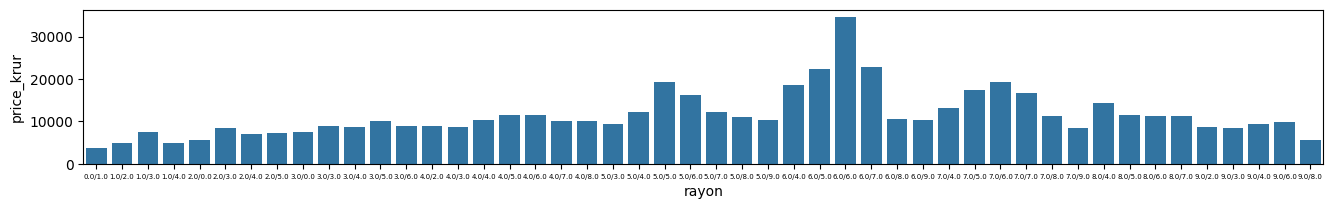

In [40]:
#есть 1 район прям премиальный (в центре) - сильно отличается цена
plt.figure(figsize=(16, 2))
plt.xticks(size=5)
sns.barplot(data=agg_geo,y='price_krur',x='rayon')

#6.0/6.0

In [41]:
#эффект 1го и последнего этажей
data_set['price_krur']=data_set['price']/1000
data_set['floor_group']='rest_floor'
data_set.loc[data_set['floor']==1,'floor_group']='first_floor'
data_set.loc[data_set['floor']==data_set['floors_total'],'floor_group']='last_floor'


data_set.groupby('floor_group').agg({'price_krur':'mean'}).reset_index()

#эффект 1го этажа ярко выражен - квартиры стоят дешевле
#последний этаж - незначительная скидка

,floor_group,price_krur
0,first_floor,11364.924092
1,last_floor,14713.407303
2,rest_floor,15608.930337


выводы по датасету
1 - есть пропуски и выбросы в данных, есть дубли
2 - есть признаки, которые нужно обрабатывать (география, тип здания)
3 - из предварительного анализа самые важные признаки, которые влияют на цену
 - цена положительно зависит от площади, от количества комнат, от размера потолка и слабо отрицательно от количества квартир в доме
 - наличие лифта, этажность, признак апартаментов почти не влияют на цену

In [48]:
# 2.6 логирование артефактов в MLflow

In [42]:
#ОБУЧАЕМ НАШУ БАЗОВУЮ МОДЕЛЬ И ЛОГИРУЕМ

binary_cat_features=data_set[['has_elevator', 'is_apartment']]
num_features=data_set[['build_year', 'ceiling_height', 'floors_total', 'floor', 'rooms', 'total_area','flats_count']] #'latitude', 'longitude', 
target=data_set['price']

#Объединяем трансформации

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from category_encoders import CatBoostEncoder

binary_cols = binary_cat_features.columns.tolist()
num_cols = num_features.columns.tolist()

# определите список трансформаций в рамках ColumnTransformer
preprocessor = ColumnTransformer(
[
    ('binary',OneHotEncoder(drop='if_binary'),binary_cols),
    ('num',StandardScaler(),num_cols)
],verbose_feature_names_out=False,remainder='drop'
)

# трансформируйте исходные данные data с помощью созданного preprocessor
data_transformed_model_0 = preprocessor.fit_transform(data_set,data_set['price'])
data_transformed_model_0=pd.DataFrame(data_transformed_model_0, columns=preprocessor.get_feature_names_out())
data_transformed_model_0.head(2)


,has_elevator_True,is_apartment_True,build_year,ceiling_height,floors_total,floor,rooms,total_area,flats_count
0,1.0,0.0,-0.966574,-0.518002,-0.296858,0.323597,-1.170397,-0.840759,-0.872631
1,1.0,0.0,0.686762,1.350878,-0.626516,-0.055040,-1.170397,-0.557565,-0.803439


In [43]:
#ДЕЛАЮ РАЗДЕЛЕНИЕ НА TRAIN TEST
data_transformed_model_0['price']=data_set['price']

x=data_transformed_model_0.drop(columns=['price'])
y=data_transformed_model_0['price']

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(x,y,test_size=0.2) 

In [44]:
#регрессия - предсказание числа

#from sklearn.linear_model import Lasso
#model=Lasso()
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_tr,y_tr)
y_pred=model.predict(X_val)


features=pd.DataFrame(X_tr.columns)
features.columns=['feature']
features['coeff']=model.coef_/1000
features

df=pd.DataFrame(y_val/1000) 

df['y_pred']=y_pred/1000
df

,price,y_pred
30797,10250.0,10997.650308
52562,11400.0,8948.717261
82683,9500.0,6746.277085
121762,17200.0,11813.305409
76747,10500.0,10664.467733
...,...,...
3073,90000.0,33279.482642
109856,8500.0,7058.009730
89837,10300.0,11557.379726
113644,10770.0,14905.486016


In [17]:
#Расчет метрик

from sklearn.metrics import roc_auc_score,mean_squared_error,r2_score

# расчёт метрик качества
metrics = {}
r2_sc = r2_score(y_val,y_pred)
metrics["r2"] = r2_sc
mse=mean_squared_error(y_val,y_pred)
metrics["mse"]=mse

metrics

{'r2': 0.6658816312057878, 'mse': 49198764900740.38}

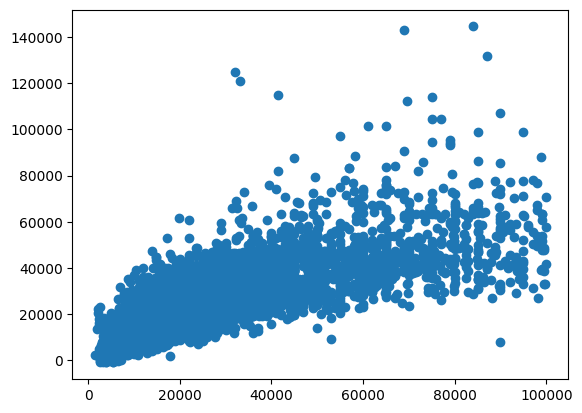

In [53]:
fig=plt.scatter(df['price'],df['y_pred'])
fig
plt.savefig("artifacts/base_figure.png")

In [54]:
#в MLFLOW

##MLFLOW info

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = "SPRINT_2_PROJECT_EXP"
RUN_NAME = "SPRINT_2_base_model"
REGISTRY_MODEL_NAME ="MODEL_0"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net"
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID")
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY")

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

if mlflow.get_experiment_by_name(name=EXPERIMENT_NAME):
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
else:
    mlflow.set_experiment(EXPERIMENT_NAME)
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
  

In [55]:
experiment_id

'25'

In [56]:
signature = mlflow.models.infer_signature(X_val, y_val)
input_example = X_val[:10]

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    r2_sc = r2_score(y_val,y_pred)
    mse=mean_squared_error(y_val,y_pred)
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="models_sprint2",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        input_example=input_example,
        await_registration_for=60
		)
    mlflow.log_metric("r2", r2_sc)
    mlflow.log_metric("MSE", mse)
    mlflow.log_artifact("artifacts/base_figure.png","artifacts")

/home/mle-user/mle_projects/mle-project-sprint-2/.venv_project_sprint2/lib/python3.10/site-packages/mlflow/models/signature.py:213: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  outputs = _infer_schema(model_output) if model_output is not None else None
Registered model 'MODEL_0' already exists. Creating a new version of this model...
2024/12/06 16:03:21 INFO mlflow.trackin

#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


гипотезы для дальнейшего развития:
результат модели 0 достаточно неплохой - r2 67%

по результатам EDA появились следующие идеи
- обогатить kitchen/living area
- использовать дорогой район как признак для модели
- использовать тип здания как признак для модели
- возможно наличие нелинейных связей и полиномиальная модель покажет лучший результа

In [57]:
# 3.1 ручная генерация признаков

In [45]:
data_set2=data_set

data_set2['living_share'] = data_set2['living_area']/data_set2['total_area'] # Рассчитаем долю жилой площади:
data_set2['kitchen_share'] = data_set2['kitchen_area']/data_set2['total_area'] # Вычислим долю площади кухни:

data_set2['median_living']=data_set2.groupby('rooms')['living_share'].transform('median')
data_set2['median_kitchen']=data_set2.groupby('rooms')['kitchen_share'].transform('median')
#пробую на отдельном поле (потом проверить)
data_set2['living_area_test']=data_set2['living_area']
data_set2['kitchen_area_test']=data_set2['kitchen_area']

In [46]:
data_set2.loc[data_set2['living_area'] == 0,'living_area'] = data_set2['median_living']*data_set2['total_area']
data_set2.loc[data_set2['kitchen_area'] == 0,'kitchen_area'] = data_set2['median_kitchen']*data_set2['total_area']

#проверяю что получилось обогатить
data_set2.query('living_area_test==0')[['rooms','living_area','living_area_test']].head(5)

,rooms,living_area,living_area_test
5,2,30.228147,0.0
7,1,26.547368,0.0
38,1,20.727367,0.0
39,3,48.267125,0.0
49,3,77.671233,0.0


In [47]:
#теперь удаляю из датасета лишние поля
data_set2=data_set2.drop(columns=['median_living', 'median_kitchen', 'living_area_test','kitchen_area_test', 'living_share','kitchen_share'])

#теперь удаляю где есть пропуски
data_set2=data_set2.query('living_area!=0 and kitchen_area!=0')

In [48]:
# тут пустых нет
data_set2[data_set2['price'].isna()==True]

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,building_id,price_krur,floor_group


In [62]:
# 3.2 оборачивание всех преобразований в объекты sklearn

In [49]:
#разделим опять признаки

binary_cat_features=data_set2[['has_elevator', 'is_apartment']]
num_features=data_set2[['build_year', 'ceiling_height', 'floors_total', 'floor', 'rooms', 'total_area','flats_count','kitchen_area','living_area']] 
target=data_set2['price']
territory_features=data_set2[['latitude','longitude']]
build_type_feature=data_set2[['building_type_int','floor_group']]

In [50]:
#Объединяем трансформации

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from category_encoders import CatBoostEncoder

binary_cols = binary_cat_features.columns.tolist()
num_cols = num_features.columns.tolist()
territory_cols=territory_features.columns.tolist()
build_type_cols=build_type_feature.columns.tolist()

# определите список трансформаций в рамках ColumnTransformer
preprocessor = ColumnTransformer(
[
    ('binary',OneHotEncoder(drop='if_binary'),binary_cols),
    ('build_type',OneHotEncoder(drop='if_binary'),build_type_cols),
    ('num',StandardScaler(),num_cols),
    ('geo',KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'),territory_cols),

],verbose_feature_names_out=False,remainder='passthrough'#'drop'
)
# трансформируйте исходные данные data с помощью созданного preprocessor
data_transformed_model_1 = preprocessor.fit_transform(data_set2,data_set2['price'])
data_transformed_model_1=pd.DataFrame(data_transformed_model_1, columns=preprocessor.get_feature_names_out())
data_transformed_model_1.head(2).T

/home/mle-user/mle_projects/mle-project-sprint-2/.venv_project_sprint2/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,0,1
has_elevator_True,1.0,1.0
is_apartment_True,0.0,0.0
building_type_int_0,0.0,0.0
building_type_int_1,0.0,0.0
building_type_int_2,0.0,1.0
building_type_int_3,0.0,0.0
building_type_int_4,0.0,0.0
building_type_int_5,0.0,0.0
building_type_int_6,1.0,0.0
floor_group_first_floor,0.0,0.0


In [51]:
data_transformed_model_1[['latitude','longitude']]=data_transformed_model_1[['latitude','longitude']].astype('str')
data_transformed_model_1['rayon_']=data_transformed_model_1['latitude']+'/'+data_transformed_model_1['longitude']

data_transformed_model_1.head(1).T


,0
has_elevator_True,1.0
is_apartment_True,0.0
building_type_int_0,0.0
building_type_int_1,0.0
building_type_int_2,0.0
building_type_int_3,0.0
building_type_int_4,0.0
building_type_int_5,0.0
building_type_int_6,1.0
floor_group_first_floor,0.0


In [52]:
#район #6.0/6.0
data_transformed_model_1['rayon']=0
mask=(data_transformed_model_1['rayon_']=='6.0/6.0')
data_transformed_model_1.loc[mask,'rayon']=1

In [53]:
data_transformed_model_1['rayon'].value_counts()
#проверяю
#data_transformed_model_1.query('rayon==1')

rayon
0    120203
1      5923
Name: count, dtype: int64

In [54]:
#удаляю лишние признаки
data_transformed_model_1=data_transformed_model_1.drop(columns=['id','latitude','longitude','studio','building_id','price_krur','rayon_'])
data_transformed_model_1.head(1).T

,0
has_elevator_True,1.0
is_apartment_True,0.0
building_type_int_0,0.0
building_type_int_1,0.0
building_type_int_2,0.0
building_type_int_3,0.0
building_type_int_4,0.0
building_type_int_5,0.0
building_type_int_6,1.0
floor_group_first_floor,0.0


In [69]:
# 3.3 автоматическая генерация признаков

In [70]:
#этот шаг пропускаю, постоянно вылетает виртуальная машина, получается только на сэмпле сгенерить признаки
#см файл notebook7_v3_backup

In [71]:
# 3.4 обучение новой версии модели

In [55]:
x=data_transformed_model_1.drop(columns=['price'])
y=data_transformed_model_1['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

In [56]:
#учу модель 1

from sklearn.linear_model import Ridge
model_1=Ridge()
model_1=model_1.fit(X_train,y_train)
y_pred_1=model_1.predict(X_test)


features_1=pd.DataFrame(X_train.columns)
features_1.columns=['feature']
features_1['coeff']=model_1.coef_/1000
features_1

,feature,coeff
0,has_elevator_True,457.662136
1,is_apartment_True,-416.556055
2,building_type_int_0,867.551857
3,building_type_int_1,-170.854750
4,building_type_int_2,3189.144832
5,building_type_int_3,2722.709139
6,building_type_int_4,-232.929279
7,building_type_int_5,-6609.040867
8,building_type_int_6,233.419068
9,floor_group_first_floor,-688.707765


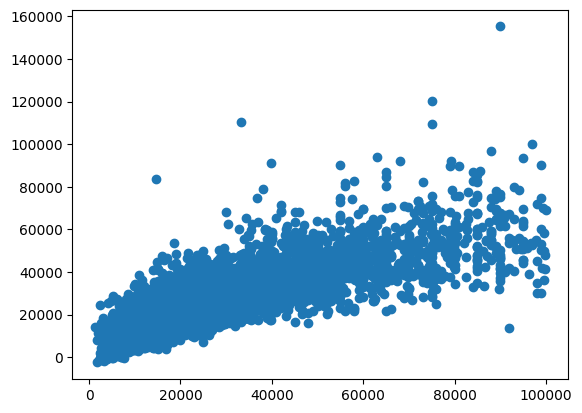

In [57]:

df_1=pd.DataFrame(y_test/1000) 

df_1['y_pred']=y_pred_1/1000
#df_1

fig_1=plt.scatter(df_1['price'],df_1['y_pred'])
fig_1
plt.savefig("artifacts/figure_1.png")

#чуть поменялся масштаб графика

In [58]:
#Расчет метрик

# расчёт метрик качества
metrics_1 = {}
r2_sc = r2_score(y_test,y_pred_1)
metrics_1["r2"] = r2_sc
mse=mean_squared_error(y_test,y_pred_1)
metrics_1["mse"]=mse

metrics_1

{'r2': 0.7187323105446903, 'mse': 40475464284352.66}

обе метрики стали лучше по сравнению с базовой моделью

In [76]:
# 3.5 логирование артефактов в MLflow

In [77]:
#в MLFLOW

##MLFLOW info

EXPERIMENT_NAME = "SPRINT_2_PROJECT_EXP"
RUN_NAME = "SPRINT_2_new_features"
REGISTRY_MODEL_NAME ="MODEL_1"


if mlflow.get_experiment_by_name(name=EXPERIMENT_NAME):
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
else:
    mlflow.set_experiment(EXPERIMENT_NAME)
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
  

In [78]:
experiment_id

'25'

In [79]:
signature = mlflow.models.infer_signature(X_test, y_test)
input_example = X_test[:10]

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    model_1.fit(X_train, y_train)
    y_pred_1 = model_1.predict(X_test)

    r2_sc = r2_score(y_test,y_pred_1)
    mse=mean_squared_error(y_test,y_pred_1)
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="models_sprint2",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        input_example=input_example,
        await_registration_for=60
		)
    mlflow.log_metric("r2", r2_sc)
    mlflow.log_metric("MSE", mse)
    mlflow.log_artifact("artifacts/figure_1.png","artifacts")

/home/mle-user/mle_projects/mle-project-sprint-2/.venv_project_sprint2/lib/python3.10/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None
/home/mle-user/mle_projects/mle-project-sprint-2/.venv_project_sprint2/lib/python3.10/site-packages/mlflow/models/signature.p

#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


In [80]:
# 4.1 Отбор признаков при помощи метода номер 1

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import Ridge
model=Ridge()
sbs1 = SFS(model_1, k_features=9,forward=True, floating=False, scoring='neg_mean_squared_error', cv=3, n_jobs=1)

sbs1 = sbs1.fit(X_train, y_train)

In [ ]:
# Выбор признаков с помощью SBS
selected_feature_indices = sbs1.k_feature_idx_
#top_sfs=np.array(df)[list(selected_feature_indices)]
top_sfs=sbs1.k_feature_names_
top_sfs

('building_type_int_2',
 'building_type_int_4',
 'build_year',
 'ceiling_height',
 'rooms',
 'total_area',
 'flats_count',
 'rayon')

In [83]:
feature_otbor=[]

for i in range(len(top_sfs)):
    feature_otbor.append(top_sfs[i])
feature_otbor

['building_type_int_2',
 'building_type_int_4',
 'build_year',
 'ceiling_height',
 'rooms',
 'total_area',
 'flats_count',
 'rayon']

In [84]:
# 4.2 Отбор признаков при помощи метода номер 2

In [85]:
#в обратную сторону

sbs2 = SFS(model_1, k_features=9, forward=False, floating=False, scoring='neg_mean_squared_error', cv=2, n_jobs=1)
sbs2 = sbs2.fit(X_train, y_train)

In [86]:
# Выбор признаков с помощью SBS
selected_feature_indices2 = sbs2.k_feature_idx_
#top_sbs=np.array(df)[list(selected_feature_indices2)]
top_sbs=sbs2.k_feature_names_
top_sbs

('building_type_int_2',
 'build_year',
 'ceiling_height',
 'floors_total',
 'rooms',
 'total_area',
 'flats_count',
 'rayon')

In [87]:
feature_otbor2=[]

for i in range(len(top_sbs)):
    feature_otbor2.append(top_sbs[i])
feature_otbor2

['building_type_int_2',
 'build_year',
 'ceiling_height',
 'floors_total',
 'rooms',
 'total_area',
 'flats_count',
 'rayon']

In [88]:
feature_otbor_result=list(set(feature_otbor).union(feature_otbor2))
feature_otbor_result

['flats_count',
 'floors_total',
 'rayon',
 'building_type_int_4',
 'rooms',
 'building_type_int_2',
 'build_year',
 'ceiling_height',
 'total_area']

In [93]:
# 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

In [89]:
X_train_selected = X_train[feature_otbor_result]
X_test_selected = X_test[feature_otbor_result]

X_train_selected.head(3)

,flats_count,floors_total,rayon,building_type_int_4,rooms,building_type_int_2,build_year,ceiling_height,total_area
78330,0.575089,0.36246,0,0.0,1.00163,1.0,1.467504,1.350878,1.22046
113963,-0.638441,0.527289,0,1.0,-1.170397,0.0,0.227502,-0.518002,-0.700954
72731,-0.947146,0.032801,0,0.0,1.00163,0.0,-0.415462,-0.518002,0.829724


In [94]:
# 4.4 Обучение новой версии модели

In [90]:
model_2=Ridge()
model_otbor=model_2.fit(X_train_selected,y_train)
y_pred_otbor=model_2.predict(X_test_selected)

In [91]:
# расчёт метрик качества
metrics_2 = {}
r2_sc = r2_score(y_test,y_pred_otbor)
metrics_2["r2"] = r2_sc
mse=mean_squared_error(y_test,y_pred_otbor)
metrics_2["mse"]=mse

metrics_2

{'r2': 0.7105984859677652, 'mse': 41181795480470.0}

качество почти не поменялось после удаления более половины признаков
интерпретировать модель так гораздо проще

In [92]:
features_2=pd.DataFrame(X_train_selected.columns)
features_2.columns=['feature']
features_2['coeff']=model_2.coef_/1000
features_2

,feature,coeff
0,flats_count,-525.939459
1,floors_total,518.595171
2,rayon,11350.646222
3,building_type_int_4,-421.303757
4,rooms,-1685.226532
5,building_type_int_2,2835.435495
6,build_year,-1152.187699
7,ceiling_height,1517.138525
8,total_area,9533.615945


Самые важные признаки - это район и общая площадь
старые дома ценятся выше новых

In [95]:
# 4.5 Логирование всех артефактов в MLflow

In [105]:
#в MLFLOW

##MLFLOW info

EXPERIMENT_NAME = "SPRINT_2_PROJECT_EXP"
RUN_NAME = "SPRINT_2_drop_features"
REGISTRY_MODEL_NAME ="MODEL_2"


if mlflow.get_experiment_by_name(name=EXPERIMENT_NAME):
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
else:
    mlflow.set_experiment(EXPERIMENT_NAME)
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)

In [106]:
experiment_id

'25'

In [107]:
signature = mlflow.models.infer_signature(X_test_selected, y_test)
input_example = X_test_selected[:10]

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    model_2.fit(X_train_selected, y_train)
    y_pred_2 = model_2.predict(X_test_selected)

    r2_sc = r2_score(y_test,y_pred_2)
    mse=mean_squared_error(y_test,y_pred_2)
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="models_sprint2",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        input_example=input_example,
        await_registration_for=60
		)
    mlflow.log_metric("r2", r2_sc)
    mlflow.log_metric("MSE", mse)
    #mlflow.log_artifact("artifacts/figure_1.png","artifacts")

/home/mle-user/mle_projects/mle-project-sprint-2/.venv_project_sprint2/lib/python3.10/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None
/home/mle-user/mle_projects/mle-project-sprint-2/.venv_project_sprint2/lib/python3.10/site-packages/mlflow/models/signature.p

### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

In [108]:
#вот отсюда будет отличие для OPTUNA
##MLFLOW info

EXPERIMENT_NAME = "SPRINT_2_PROJECT_EXP"
RUN_NAME = "SPRINT_2_giper_optuna1_r2"
REGISTRY_MODEL_NAME ="MODEL_3"


STUDY_DB_NAME = "sqlite:///local.study.db"
STUDY_NAME = "STUDY_OPTUNA_SPRINT2"

In [96]:
# 5.1 Подбор гиперпарметров при помощи метода номер 1

In [109]:
import optuna
from collections import defaultdict
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import array
import joblib

# Определение функции для Optuna
def objective(trial: optuna.Trial) -> float:
    param = {
        'alpha': trial.suggest_float("alpha",0.001, 300)}
    model=Ridge(**param)
    model.fit(X_train_selected,y_train)
    y_pred_optuna=model.predict(X_test_selected)

    #вычисление метрик
    r2=r2_score(y_test,y_pred_optuna)
    return r2


In [110]:
from optuna.integration.mlflow import MLflowCallback

import warnings
warnings.filterwarnings("ignore")

In [98]:
# 5.3 Формирование списка гиперпараметров для новой модели

In [111]:
# Настройка эксперимента в MLflow
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

if mlflow.active_run():
    print(f"Active run exists: {mlflow.active_run().info.run_id}")
    mlflow.end_run()  # Завершить текущий run

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id, nested=True) as run:
    run_id = run.info.run_id
    
    #mlflow.catboost.log_model(model,'model_pkl')

# Callback для Optuna
    mlflc = MLflowCallback(
        tracking_uri=f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}",
        metric_name="r2",
        create_experiment=False,
        mlflow_kwargs={'experiment_id': experiment_id, 'nested': True,'tags': {'mlflow.parentRunId': run_id}})

# Запуск Optuna с использованием функции objective
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        direction='maximize',
        study_name=STUDY_NAME,
        storage=STUDY_DB_NAME,
        load_if_exists=True)
    study.optimize(objective, n_trials=10, callbacks=[mlflc])

#ЛУЧШАЯ МОДЕЛЬ

    best_params = study.best_params
#print(f"Число завершенных испытаний: {len(study.trials)}")
#print(f"Лучшие параметры: {best_params}")


# 5.4 Обуение финальной версии модели
    model_optuna1=Ridge(**best_params)
    model_optuna1.fit(X_train_selected,y_train)
#сохраняем модель

    joblib.dump(model_optuna1,'model_optuna1.pkl')
# логируем в MLFLOW

    mlflow.sklearn.log_model(model_optuna1,"cv")
    mlflow.log_artifact('model_optuna1.pkl',artifact_path='cv')

[I 2024-12-06 16:40:38,065] A new study created in RDB with name: STUDY_OPTUNA_SPRINT2
[I 2024-12-06 16:40:38,657] Trial 0 finished with value: 0.7104180001614946 and parameters: {'alpha': 196.2675455836562}. Best is trial 0 with value: 0.7104180001614946.
[I 2024-12-06 16:40:39,056] Trial 1 finished with value: 0.7103140426247901 and parameters: {'alpha': 268.973633561999}. Best is trial 0 with value: 0.7104180001614946.
[I 2024-12-06 16:40:39,413] Trial 2 finished with value: 0.7105820740942509 and parameters: {'alpha': 29.591320763699564}. Best is trial 2 with value: 0.7105820740942509.
[I 2024-12-06 16:40:39,961] Trial 3 finished with value: 0.7104726745411685 and parameters: {'alpha': 151.583176085378}. Best is trial 2 with value: 0.7105820740942509.
[I 2024-12-06 16:40:40,550] Trial 4 finished with value: 0.710595634218038 and parameters: {'alpha': 6.472546421276115}. Best is trial 4 with value: 0.710595634218038.
[I 2024-12-06 16:40:41,085] Trial 5 finished with value: 0.7103620

In [112]:
 #см метрики лучшей модели
y_pred_optuna=model_optuna1.predict(X_test_selected)

# расчёт метрик качества
metrics_3 = {}
r2_sc = r2_score(y_test,y_pred_optuna)
metrics_3["r2"] = r2_sc
mse=mean_squared_error(y_test,y_pred_optuna)
metrics_3["mse"]=mse

metrics_3

{'r2': 0.710595634218038, 'mse': 41182201284062.36}

In [97]:
# 5.2 Подбор гиперпарметров при мощи метода номер 2


In [113]:
#минимизирую MSE
#вот отсюда будет отличие для OPTUNA
##MLFLOW info

EXPERIMENT_NAME = "SPRINT_2_PROJECT_EXP"
RUN_NAME = "SPRINT_2_giper_optuna2_mse"
REGISTRY_MODEL_NAME ="MODEL_3"


STUDY_DB_NAME = "sqlite:///local.study.db"
STUDY_NAME = "STUDY_OPTUNA_SPRINT2"

In [114]:


# Определение функции для Optuna
def objective(trial: optuna.Trial) -> float:
    param = {
        'alpha': trial.suggest_float("alpha",0.001, 300)}
    model=Ridge(**param)
    model.fit(X_train_selected,y_train)
    y_pred_optuna=model.predict(X_test_selected)

    #вычисление метрик
    mse=mean_squared_error(y_test,y_pred_optuna)
    return mse


In [115]:
# Настройка эксперимента в MLflow
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

if mlflow.active_run():
    print(f"Active run exists: {mlflow.active_run().info.run_id}")
    mlflow.end_run()  # Завершить текущий run

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id, nested=True) as run:
    run_id = run.info.run_id
    
    #mlflow.catboost.log_model(model,'model_pkl')

# Callback для Optuna
    mlflc = MLflowCallback(
        tracking_uri=f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}",
        metric_name="MSE",
        create_experiment=False,
        mlflow_kwargs={'experiment_id': experiment_id, 'nested': True,'tags': {'mlflow.parentRunId': run_id}})

# Запуск Optuna с использованием функции objective
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        direction='minimize',
        study_name=STUDY_NAME,
        storage=STUDY_DB_NAME,
        load_if_exists=True)
    study.optimize(objective, n_trials=10, callbacks=[mlflc])

#ЛУЧШАЯ МОДЕЛЬ

    best_params = study.best_params
#print(f"Число завершенных испытаний: {len(study.trials)}")
#print(f"Лучшие параметры: {best_params}")


# 5.4 Обуение финальной версии модели
    model_optuna2=Ridge(**best_params)
    model_optuna2.fit(X_train_selected,y_train)
#сохраняем модель

    joblib.dump(model_optuna1,'model_optuna2.pkl')
# логируем в MLFLOW

    mlflow.sklearn.log_model(model_optuna2,"cv")
    mlflow.log_artifact('model_optuna2.pkl',artifact_path='cv')

[I 2024-12-06 16:50:27,407] Using an existing study with name 'STUDY_OPTUNA_SPRINT2' instead of creating a new one.
[I 2024-12-06 16:50:28,011] Trial 10 finished with value: 41189392183841.914 and parameters: {'alpha': 79.09209944490372}. Best is trial 10 with value: 41189392183841.914.
[I 2024-12-06 16:50:28,573] Trial 11 finished with value: 41188164858003.375 and parameters: {'alpha': 68.71161867616432}. Best is trial 10 with value: 41189392183841.914.
[I 2024-12-06 16:50:29,167] Trial 12 finished with value: 41189301662012.73 and parameters: {'alpha': 78.34466785779819}. Best is trial 10 with value: 41189392183841.914.
[I 2024-12-06 16:50:29,809] Trial 13 finished with value: 41192947736740.62 and parameters: {'alpha': 106.57048946663424}. Best is trial 13 with value: 41192947736740.62.
[I 2024-12-06 16:50:30,549] Trial 14 finished with value: 41192373167596.54 and parameters: {'alpha': 102.35024575660569}. Best is trial 13 with value: 41192947736740.62.
[I 2024-12-06 16:50:31,231]

In [100]:
# 5.5 Логирование артефактов в MLflow